In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Desktop/pothole v2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Admin/Desktop/pothole v2\.ipynb_checkpoints\Untitled-checkpoint.ipynb
C:/Users/Admin/Desktop/pothole v2\test\Cracks\C2 (1).jpeg
C:/Users/Admin/Desktop/pothole v2\test\Cracks\C2 (10).jpeg
C:/Users/Admin/Desktop/pothole v2\test\Cracks\C2 (11).jpeg
C:/Users/Admin/Desktop/pothole v2\test\Cracks\C2 (12).jpeg
C:/Users/Admin/Desktop/pothole v2\test\Cracks\C2 (2).jpeg
C:/Users/Admin/Desktop/pothole v2\test\Cracks\C2 (3).jpeg
C:/Users/Admin/Desktop/pothole v2\test\Cracks\C2 (4).jpeg
C:/Users/Admin/Desktop/pothole v2\test\Cracks\C2 (5).jpeg
C:/Users/Admin/Desktop/pothole v2\test\Cracks\C2 (6).jpeg
C:/Users/Admin/Desktop/pothole v2\test\Cracks\C2 (7).jpeg
C:/Users/Admin/Desktop/pothole v2\test\Cracks\C2 (8).jpeg
C:/Users/Admin/Desktop/pothole v2\test\Cracks\C2 (9).jpeg
C:/Users/Admin/Desktop/pothole v2\test\Cracks\Thumbs.db
C:/Users/Admin/Desktop/pothole v2\test\Patches\C3 (1).jpeg
C:/Users/Admin/Desktop/pothole v2\test\Patches\C3 (10).jpeg
C:/Users/Admin/Desktop/pothole v2\test\Patches\

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import keras.preprocessing.image as img
from keras.applications.resnet50 import ResNet50

In [5]:
os.listdir('C:/Users/Admin/Desktop/pothole v2/train')

['Cracks', 'Patches', 'Plain', 'Pothole']

In [6]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass
        
def assign_label(img,label):
    return label

In [7]:
X=[]
Z=[]
IMG_SIZE=256
Plain='C:/Users/Admin/Desktop/pothole v2//train/Plain'
Pothole='C:/Users/Admin/Desktop/pothole v2//train/Pothole'
Cracks='C:/Users/Admin/Desktop/pothole v2//train/Cracks'
Patches='C:/Users/Admin/Desktop/pothole v2//train/Patches'

make_train_data('Plain',Plain)
make_train_data('Pothole',Pothole)
make_train_data('Cracks',Cracks)
make_train_data('Patches',Patches)

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:02<00:00, 99.66it/s]


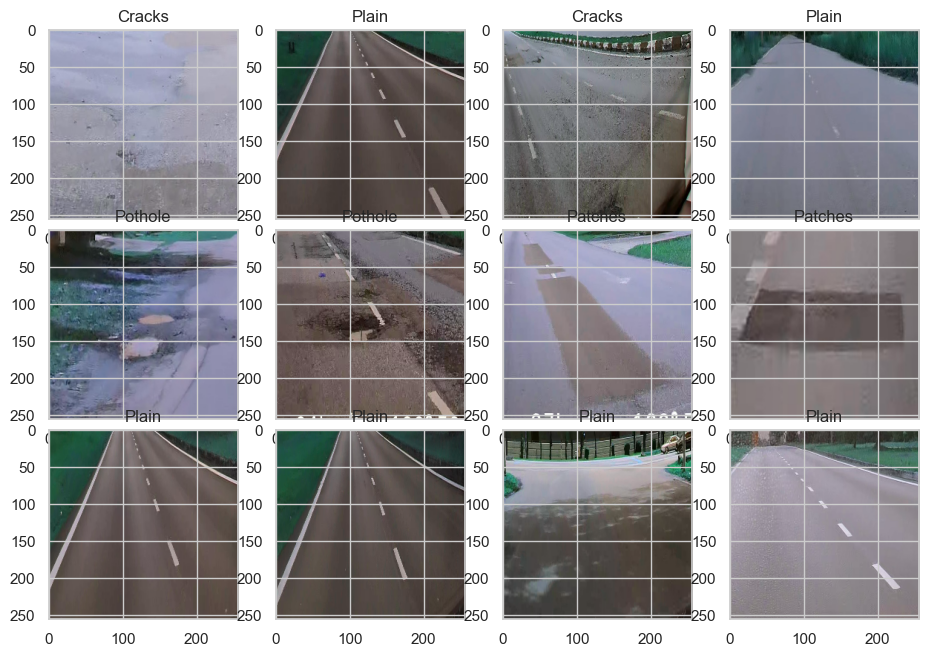

In [8]:
fig,ax=plt.subplots(3,4)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(10,15)

for i in range(3):
    for j in range (4):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

In [9]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split

# Your previous code for data preparation remains unchanged

# Custom mapping of labels to specific arrays
label_mapping = {
    'Pothole': [1, 0, 0, 0],
    'Cracks': [0, 1, 0, 0],
    'Patches': [0, 0, 1, 0],
    'Plain': [0, 0, 0, 1]
}

# Encoding labels using LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Z)

# Mapping encoded labels to the custom arrays
Y_encoded = np.array([label_mapping[label] for label in le.inverse_transform(Y)])

# Splitting the data
X = np.array(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.25, random_state=1337)

# Setting seed for random number generation
np.random.seed(42)
rn.seed(42)


In [10]:
base_model=ResNet50(include_top=False, weights='imagenet',input_shape=(256,256,3), pooling='max')
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 64, 64, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 64, 64, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 64, 64, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 32, 32, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 32, 32, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 32, 32, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 16, 16, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 16, 16, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 16, 16, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 16, 16, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 16, 16, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 16, 16, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 16, 16, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 16, 16, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 16, 16, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 16, 16, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 8, 8, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 8, 8, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 8, 8, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 8, 8, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [11]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.20))
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(4, activation='softmax'))


In [12]:
epochs=30
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)
base_model.trainable=True # setting the VGG model to be trainable.
model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 30409092 (116.00 MB)
Trainable params: 303

In [13]:
History = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/30
61/61 [==============================] - 500s 8s/step - loss: 4.7530 - accuracy: 0.6322 - val_loss: 6.9261 - val_accuracy: 0.2006
Epoch 2/30
61/61 [==============================] - 485s 8s/step - loss: 0.5907 - accuracy: 0.7757 - val_loss: 6.8358 - val_accuracy: 0.6065
Epoch 3/30
61/61 [==============================] - 490s 8s/step - loss: 0.4375 - accuracy: 0.8323 - val_loss: 0.6022 - val_accuracy: 0.8333
Epoch 4/30
61/61 [==============================] - 481s 8s/step - loss: 0.3636 - accuracy: 0.8704 - val_loss: 1.0155 - val_accuracy: 0.6867
Epoch 5/30
61/61 [==============================] - 476s 8s/step - loss: 0.3041 - accuracy: 0.8966 - val_loss: 0.5910 - val_accuracy: 0.7886
Epoch 6/30
61/61 [==============================] - 477s 8s/step - loss: 0.2477 - accuracy: 0.9100 - val_loss: 0.6004 - val_accuracy: 0.8071
Epoch 7/30
61/61 [==============================] - 485s 8s/step - loss: 0.2022 - accuracy: 0.9275 - val_loss: 0.7556 - val_accuracy: 0.7978
Epoch 8/30
61

In [21]:
model.save('C:/Users/Admin/Desktop/pothole v2/model.h5')

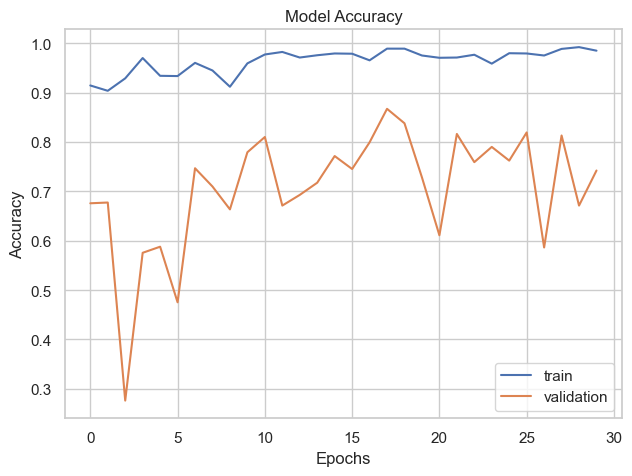

In [22]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [23]:
path = "C:/Users/Admin/Desktop/pothole v2/test/Pothole"
files = os.listdir(path)
files

['C1 (1).jpeg',
 'C1 (2).jpeg',
 'C1 (3).jpeg',
 'C1 (4).jpeg',
 'C1 (5).jpeg',
 'C1 (6).jpeg',
 'C1 (7).jpeg',
 'C1 (8).jpeg',
 'Thumbs.db']

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

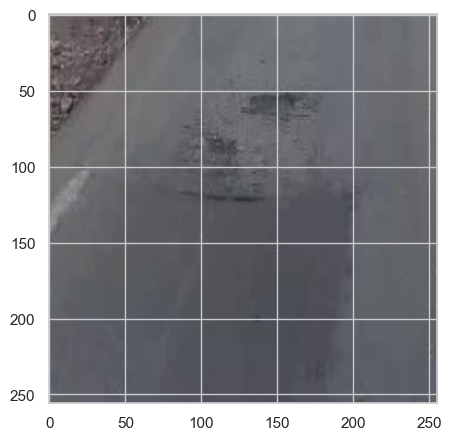

1/1 [==============================] - 1s 793ms/step


 11%|█████████▎                                                                          | 1/9 [00:01<00:08,  1.06s/it]

Cracks Road


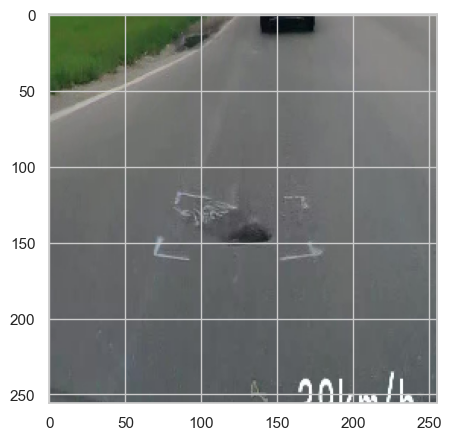

1/1 [==============================] - 0s 95ms/step


 22%|██████████████████▋                                                                 | 2/9 [00:01<00:04,  1.63it/s]

Pothole Road


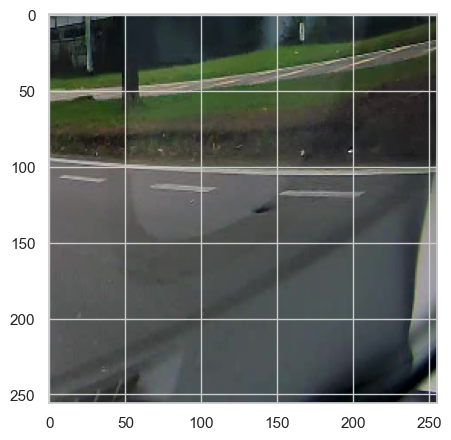

1/1 [==============================] - 0s 97ms/step


 33%|████████████████████████████                                                        | 3/9 [00:01<00:03,  2.00it/s]

Cracks Road


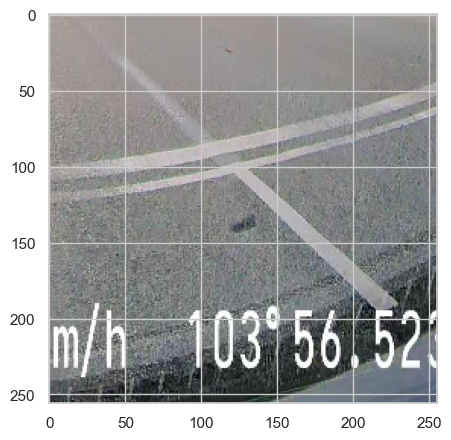

1/1 [==============================] - 0s 97ms/step


 44%|█████████████████████████████████████▎                                              | 4/9 [00:02<00:02,  2.29it/s]

Pothole Road


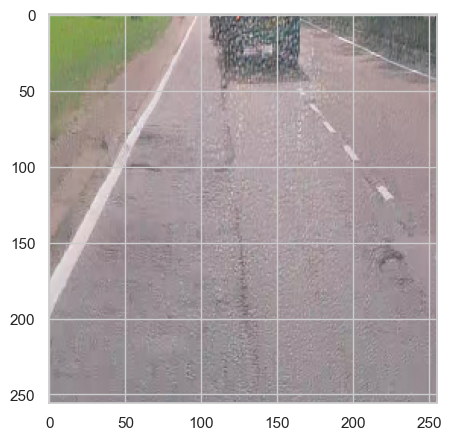

1/1 [==============================] - 0s 88ms/step


 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:02<00:01,  2.42it/s]

Cracks Road


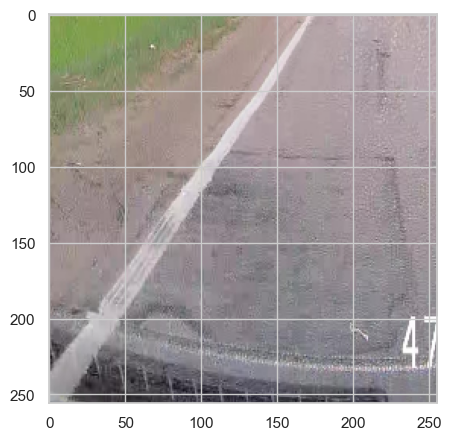

1/1 [==============================] - 0s 89ms/step


 67%|████████████████████████████████████████████████████████                            | 6/9 [00:02<00:01,  2.60it/s]

Pothole Road


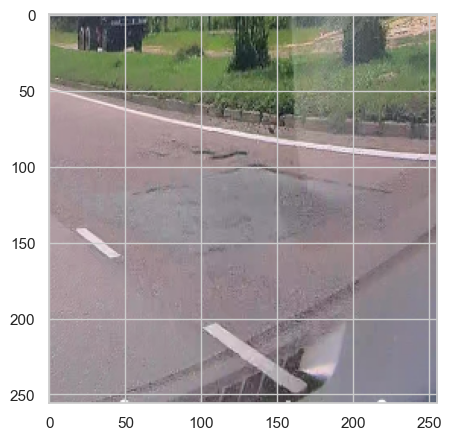

1/1 [==============================] - 0s 94ms/step


 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [00:03<00:00,  2.63it/s]

Cracks Road


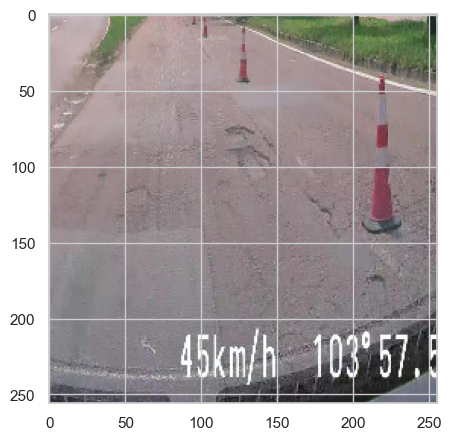

1/1 [==============================] - 0s 99ms/step


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.56it/s]

Cracks Road
Skipping non-image file: Thumbs.db


In [24]:
import os

for i in tqdm(files):
    if not i.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print(f"Skipping non-image file: {i}")
        continue  # Skip non-image files

    pth = os.path.join(path, i)
    X = cv2.imread(pth, cv2.IMREAD_COLOR)

    if X is None or X.size == 0:
        print(f"Unable to read or empty image: {pth}")
        continue  # Skip to the next image if current one is problematic

    X = cv2.resize(X, (256, 256))

    plt.figure()
    plt.imshow(X[:, :, ::-1])
    plt.show()

    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    y_pred = np.round(model.predict(X))
    if np.array_equal(y_pred[0], [1, 0, 0, 0]):
        print("Pothole Road")
    elif np.array_equal(y_pred[0], [0, 1, 0, 0]):
        print("Cracks Road")
    elif np.array_equal(y_pred[0], [0, 0, 1, 0]):
        print("Patches Road")
    else:
        print("Plain Road")



In [25]:
path = "C:/Users/Admin/Desktop/pothole v2/test/Cracks"
files = os.listdir(path)
files

['C2 (1).jpeg',
 'C2 (10).jpeg',
 'C2 (11).jpeg',
 'C2 (12).jpeg',
 'C2 (2).jpeg',
 'C2 (3).jpeg',
 'C2 (4).jpeg',
 'C2 (5).jpeg',
 'C2 (6).jpeg',
 'C2 (7).jpeg',
 'C2 (8).jpeg',
 'C2 (9).jpeg',
 'Thumbs.db']

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

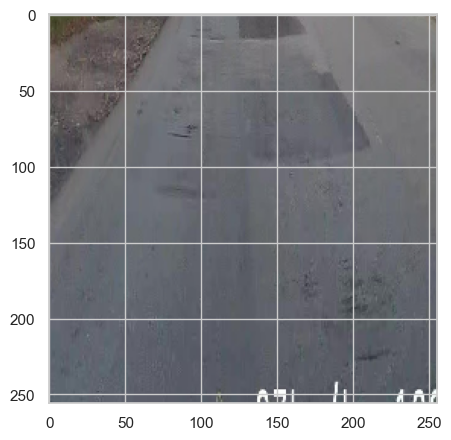

1/1 [==============================] - 0s 94ms/step


  8%|██████▍                                                                            | 1/13 [00:00<00:03,  3.12it/s]

Cracks Road


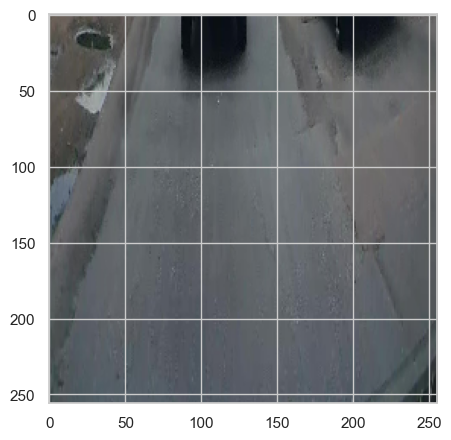

1/1 [==============================] - 0s 109ms/step


 15%|████████████▊                                                                      | 2/13 [00:00<00:03,  2.87it/s]

Cracks Road


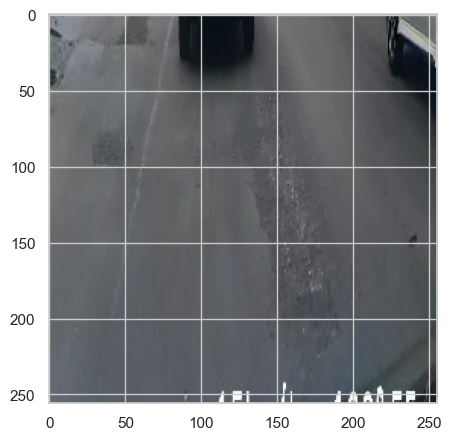

1/1 [==============================] - 0s 96ms/step


 23%|███████████████████▏                                                               | 3/13 [00:01<00:03,  3.00it/s]

Cracks Road


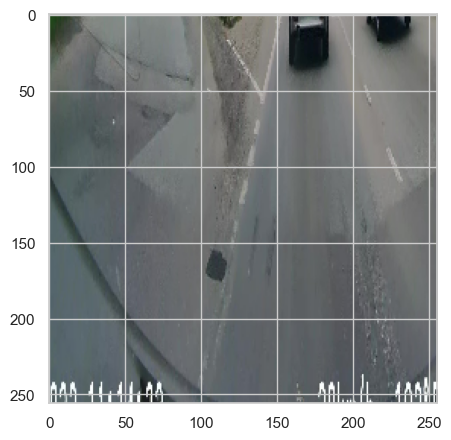

1/1 [==============================] - 0s 103ms/step


 31%|█████████████████████████▌                                                         | 4/13 [00:01<00:03,  2.90it/s]

Cracks Road


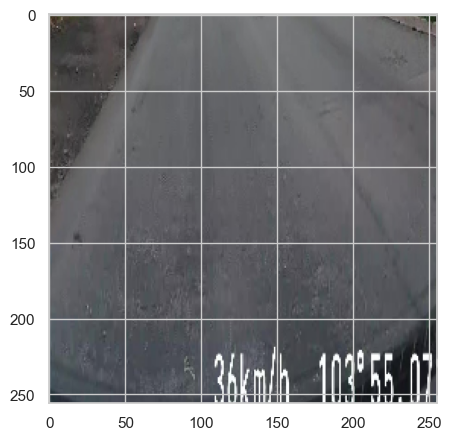

1/1 [==============================] - 0s 104ms/step


 38%|███████████████████████████████▉                                                   | 5/13 [00:01<00:02,  2.84it/s]

Cracks Road


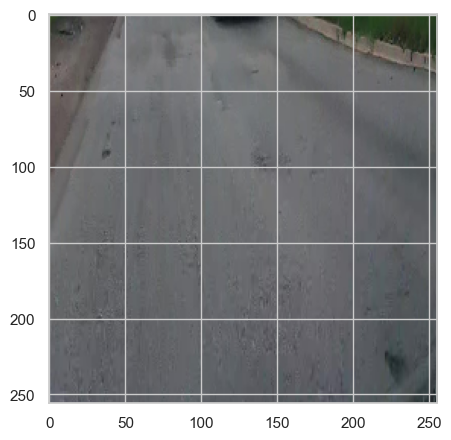

1/1 [==============================] - 0s 102ms/step


 46%|██████████████████████████████████████▎                                            | 6/13 [00:02<00:02,  2.83it/s]

Cracks Road


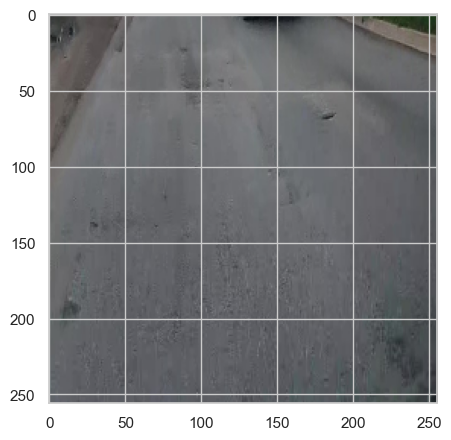

1/1 [==============================] - 0s 102ms/step


 54%|████████████████████████████████████████████▋                                      | 7/13 [00:02<00:02,  2.83it/s]

Cracks Road


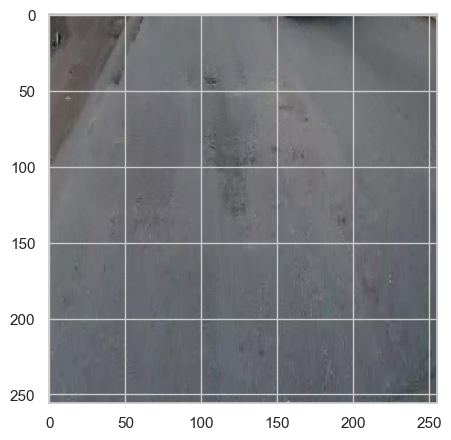

1/1 [==============================] - 0s 82ms/step


 62%|███████████████████████████████████████████████████                                | 8/13 [00:02<00:01,  2.81it/s]

Cracks Road


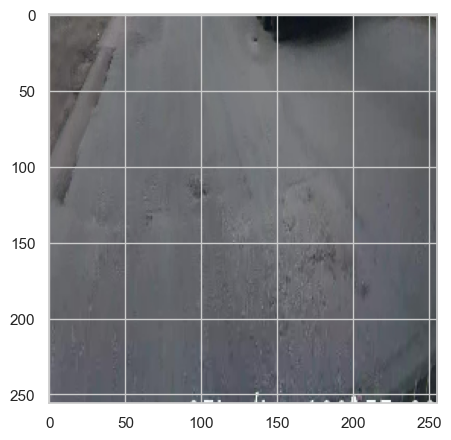

1/1 [==============================] - 0s 98ms/step


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:03<00:01,  2.82it/s]

Cracks Road


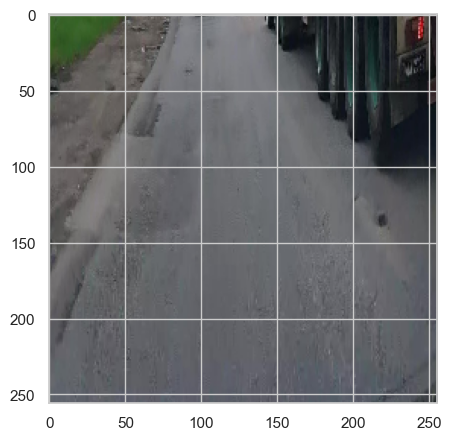

1/1 [==============================] - 0s 95ms/step


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:03<00:01,  2.89it/s]

Plain Road


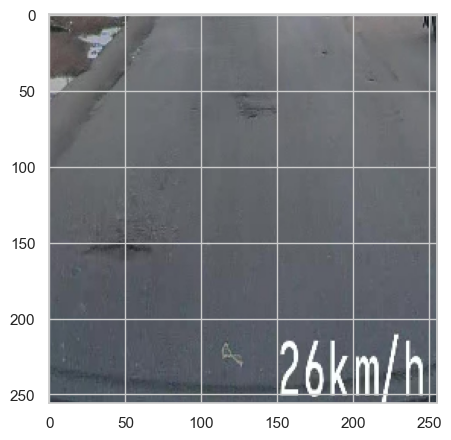

1/1 [==============================] - 0s 102ms/step


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:03<00:00,  2.89it/s]

Cracks Road


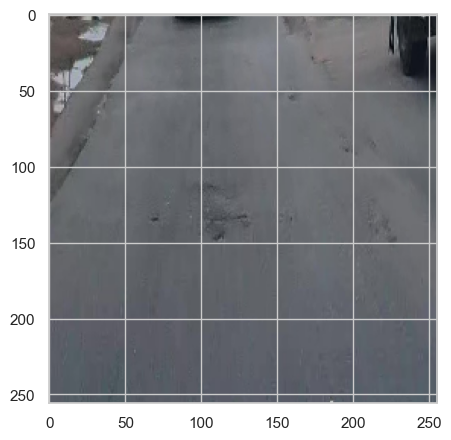

1/1 [==============================] - 0s 107ms/step


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:04<00:00,  3.11it/s]

Cracks Road
Skipping non-image file: Thumbs.db


In [26]:
import os

for i in tqdm(files):
    if not i.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print(f"Skipping non-image file: {i}")
        continue  # Skip non-image files

    pth = os.path.join(path, i)
    X = cv2.imread(pth, cv2.IMREAD_COLOR)

    if X is None or X.size == 0:
        print(f"Unable to read or empty image: {pth}")
        continue  # Skip to the next image if current one is problematic

    X = cv2.resize(X, (256, 256))

    plt.figure()
    plt.imshow(X[:, :, ::-1])
    plt.show()

    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    y_pred = np.round(model.predict(X))
    if np.array_equal(y_pred[0], [1, 0, 0, 0]):
        print("Pothole Road")
    elif np.array_equal(y_pred[0], [0, 1, 0, 0]):
        print("Cracks Road")
    elif np.array_equal(y_pred[0], [0, 0, 1, 0]):
        print("Patches Road")
    else:
        print("Plain Road")

In [27]:
path = "C:/Users/Admin/Desktop/pothole v2/test/Patches"
files = os.listdir(path)
files

['C3 (1).jpeg',
 'C3 (10).jpeg',
 'C3 (11).jpeg',
 'C3 (12).jpeg',
 'C3 (2).jpeg',
 'C3 (3).jpeg',
 'C3 (4).jpeg',
 'C3 (5).jpeg',
 'C3 (6).jpeg',
 'C3 (7).jpeg',
 'C3 (8).jpeg',
 'C3 (9).jpeg',
 'Thumbs.db']

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

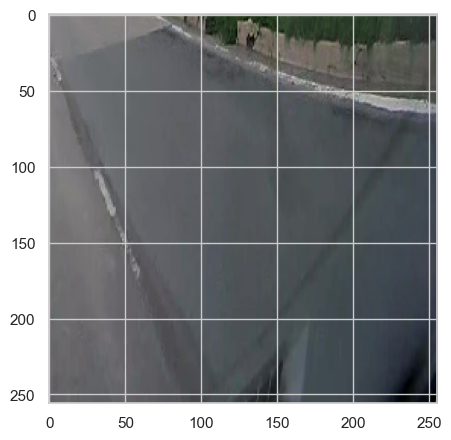

1/1 [==============================] - 0s 89ms/step


  8%|██████▍                                                                            | 1/13 [00:00<00:03,  3.09it/s]

Patches Road


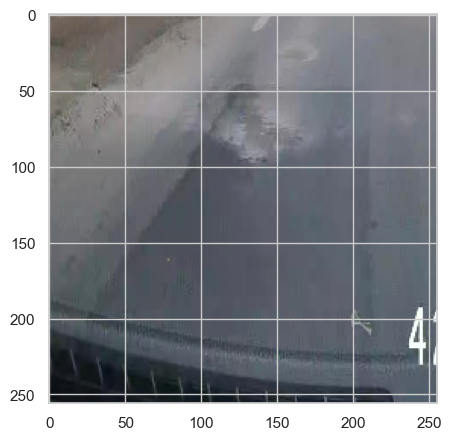

1/1 [==============================] - 0s 87ms/step


 15%|████████████▊                                                                      | 2/13 [00:00<00:03,  2.93it/s]

Patches Road


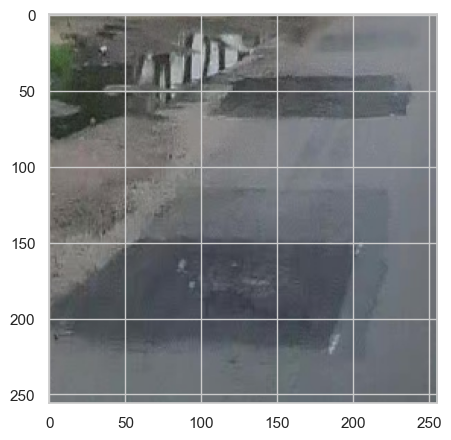

1/1 [==============================] - 0s 100ms/step


 23%|███████████████████▏                                                               | 3/13 [00:01<00:03,  2.88it/s]

Patches Road


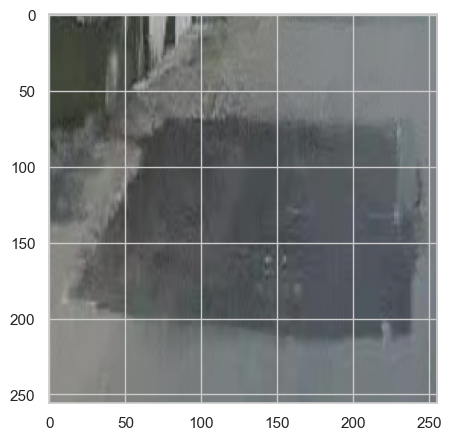

1/1 [==============================] - 0s 98ms/step


 31%|█████████████████████████▌                                                         | 4/13 [00:01<00:03,  2.87it/s]

Patches Road


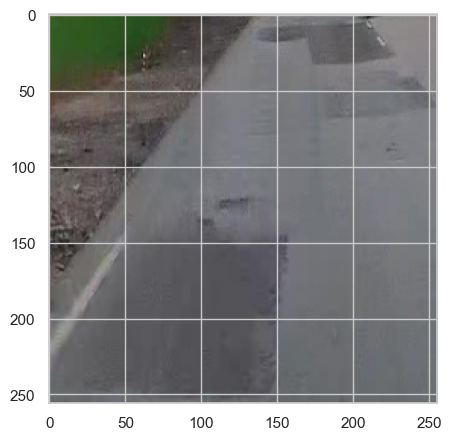

1/1 [==============================] - 0s 95ms/step


 38%|███████████████████████████████▉                                                   | 5/13 [00:01<00:02,  2.97it/s]

Patches Road


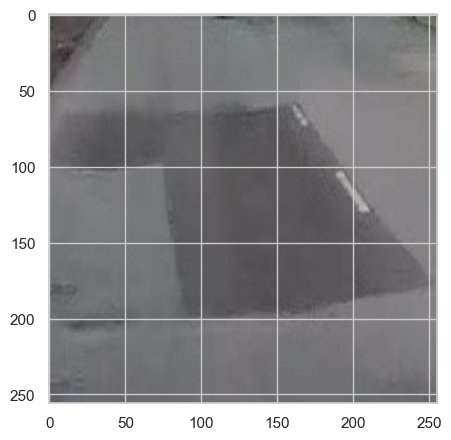

1/1 [==============================] - 0s 96ms/step


 46%|██████████████████████████████████████▎                                            | 6/13 [00:02<00:02,  2.97it/s]

Patches Road


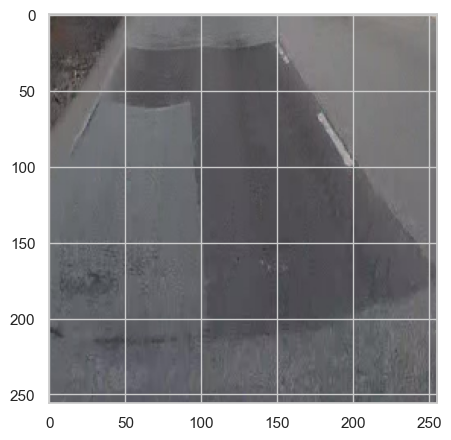

1/1 [==============================] - 0s 104ms/step


 54%|████████████████████████████████████████████▋                                      | 7/13 [00:02<00:02,  2.93it/s]

Patches Road


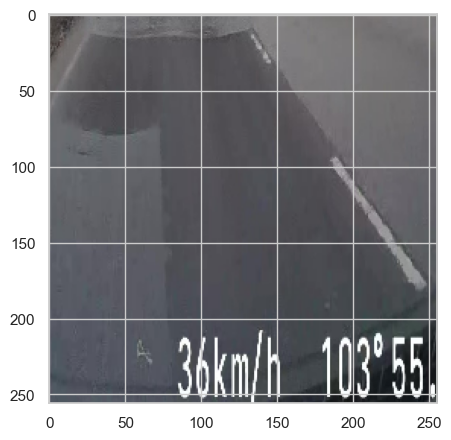

1/1 [==============================] - 0s 85ms/step


 62%|███████████████████████████████████████████████████                                | 8/13 [00:02<00:01,  2.90it/s]

Patches Road


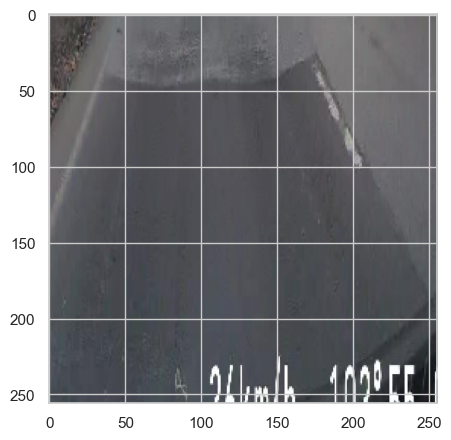

1/1 [==============================] - 0s 96ms/step


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:03<00:01,  3.00it/s]

Cracks Road


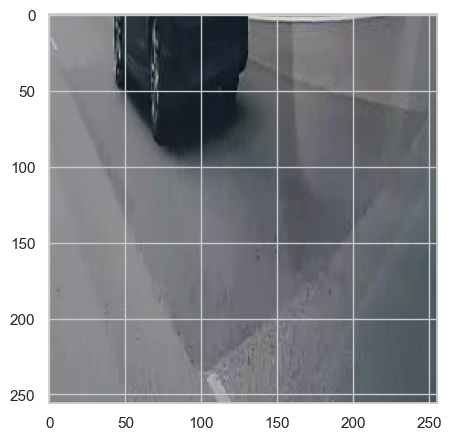

1/1 [==============================] - 0s 111ms/step


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:03<00:01,  2.95it/s]

Patches Road


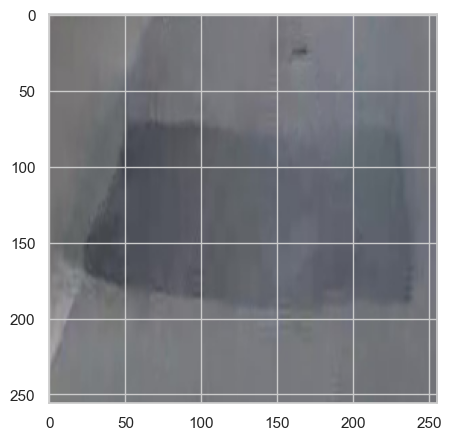

1/1 [==============================] - 0s 109ms/step


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:03<00:00,  3.07it/s]

Patches Road


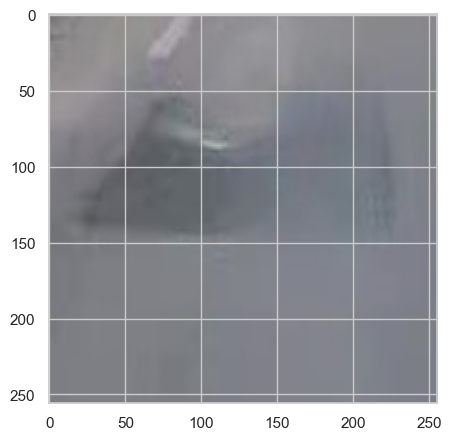

1/1 [==============================] - 0s 95ms/step


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:04<00:00,  3.23it/s]

Plain Road
Skipping non-image file: Thumbs.db


In [28]:
import os

for i in tqdm(files):
    if not i.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print(f"Skipping non-image file: {i}")
        continue  # Skip non-image files

    pth = os.path.join(path, i)
    X = cv2.imread(pth, cv2.IMREAD_COLOR)

    if X is None or X.size == 0:
        print(f"Unable to read or empty image: {pth}")
        continue  # Skip to the next image if current one is problematic

    X = cv2.resize(X, (256, 256))

    plt.figure()
    plt.imshow(X[:, :, ::-1])
    plt.show()

    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    y_pred = np.round(model.predict(X))
    if np.array_equal(y_pred[0], [1, 0, 0, 0]):
        print("Pothole Road")
    elif np.array_equal(y_pred[0], [0, 1, 0, 0]):
        print("Cracks Road")
    elif np.array_equal(y_pred[0], [0, 0, 1, 0]):
        print("Patches Road")
    else:
        print("Plain Road")

In [29]:
path = "C:/Users/Admin/Desktop/pothole v2/test/Plain"
files = os.listdir(path)
files

['C4 (1).jpeg',
 'C4 (10).jpeg',
 'C4 (11).jpeg',
 'C4 (12).jpeg',
 'C4 (13).jpeg',
 'C4 (14).jpeg',
 'C4 (15).jpeg',
 'C4 (4).jpeg',
 'C4 (6).jpeg',
 'C4 (7).jpeg',
 'C4 (8).jpeg',
 'C4 (9).jpeg',
 'Thumbs.db']

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

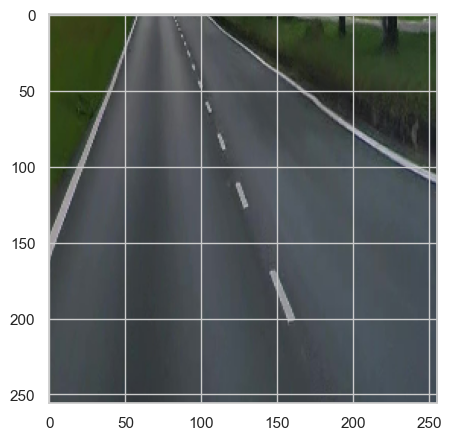

1/1 [==============================] - 0s 90ms/step


  8%|██████▍                                                                            | 1/13 [00:00<00:03,  3.13it/s]

Plain Road


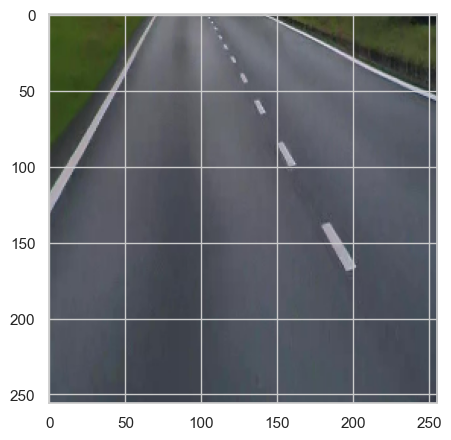

1/1 [==============================] - 0s 95ms/step


 15%|████████████▊                                                                      | 2/13 [00:00<00:03,  2.94it/s]

Plain Road


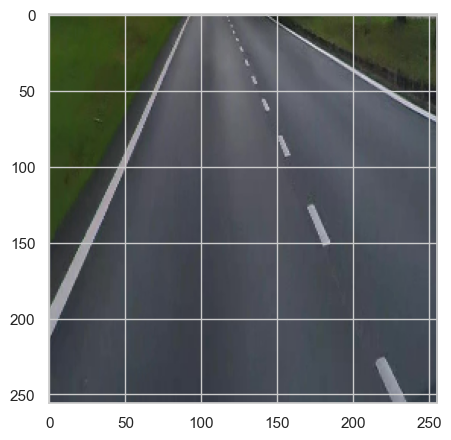

1/1 [==============================] - 0s 97ms/step


 23%|███████████████████▏                                                               | 3/13 [00:01<00:03,  2.96it/s]

Plain Road


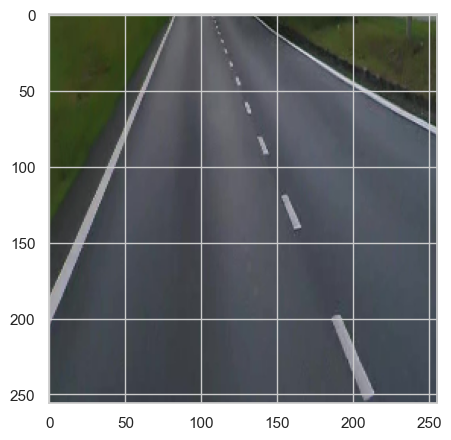

1/1 [==============================] - 0s 89ms/step


 31%|█████████████████████████▌                                                         | 4/13 [00:01<00:03,  2.86it/s]

Plain Road


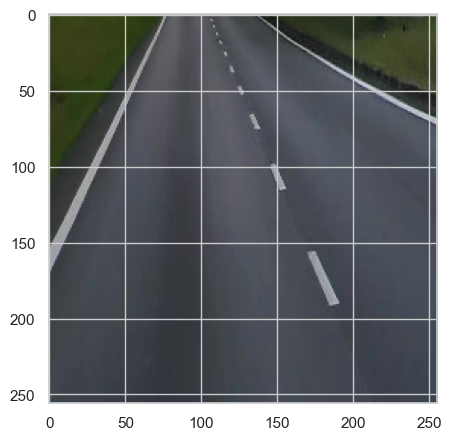

1/1 [==============================] - 0s 96ms/step


 38%|███████████████████████████████▉                                                   | 5/13 [00:01<00:02,  2.97it/s]

Plain Road


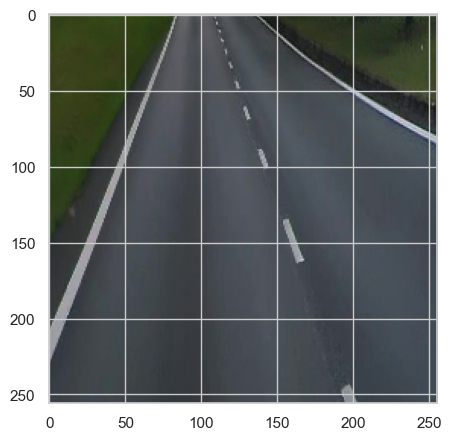

1/1 [==============================] - 0s 94ms/step


 46%|██████████████████████████████████████▎                                            | 6/13 [00:02<00:02,  2.92it/s]

Plain Road


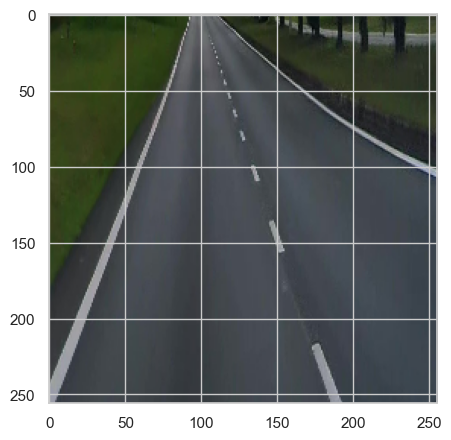

1/1 [==============================] - 0s 88ms/step


 54%|████████████████████████████████████████████▋                                      | 7/13 [00:02<00:02,  2.88it/s]

Plain Road


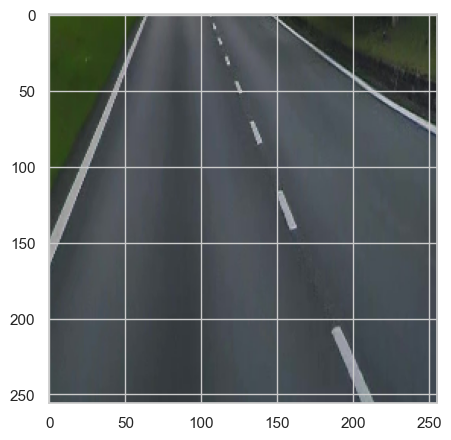

1/1 [==============================] - 0s 103ms/step


 62%|███████████████████████████████████████████████████                                | 8/13 [00:02<00:01,  2.97it/s]

Plain Road


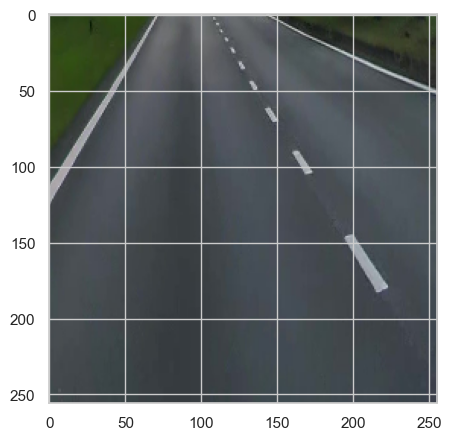

1/1 [==============================] - 0s 96ms/step


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:03<00:01,  2.97it/s]

Plain Road


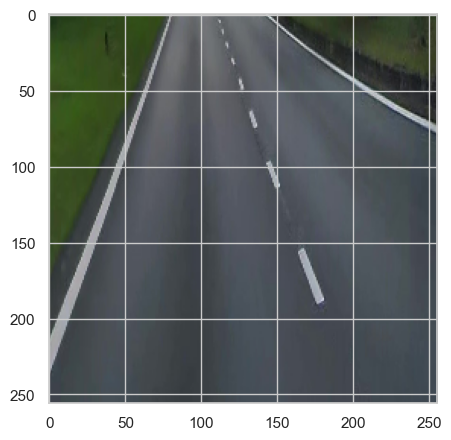

1/1 [==============================] - 0s 81ms/step


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:03<00:01,  2.92it/s]

Plain Road


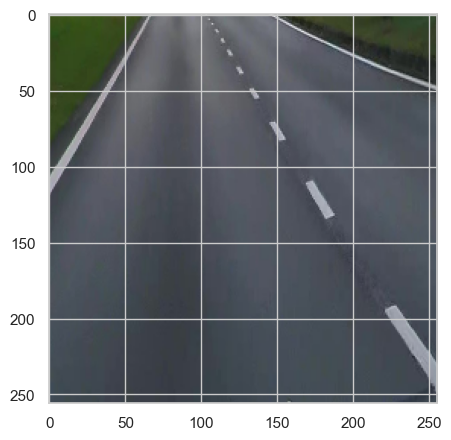

1/1 [==============================] - 0s 85ms/step


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:03<00:00,  2.94it/s]

Plain Road


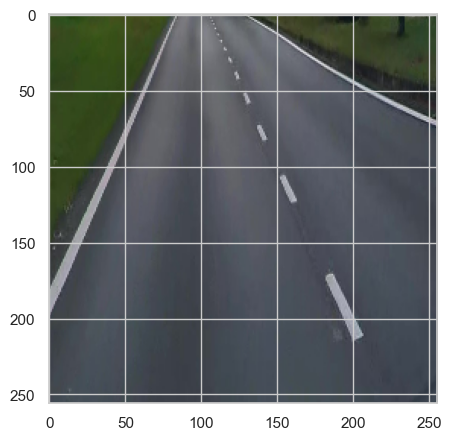

1/1 [==============================] - 0s 99ms/step


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:04<00:00,  3.16it/s]

Plain Road
Skipping non-image file: Thumbs.db


In [30]:
import os

for i in tqdm(files):
    if not i.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print(f"Skipping non-image file: {i}")
        continue  # Skip non-image files

    pth = os.path.join(path, i)
    X = cv2.imread(pth, cv2.IMREAD_COLOR)

    if X is None or X.size == 0:
        print(f"Unable to read or empty image: {pth}")
        continue  # Skip to the next image if current one is problematic

    X = cv2.resize(X, (256, 256))

    plt.figure()
    plt.imshow(X[:, :, ::-1])
    plt.show()

    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    y_pred = np.round(model.predict(X))
    if np.array_equal(y_pred[0], [1, 0, 0, 0]):
        print("Pothole Road")
    elif np.array_equal(y_pred[0], [0, 1, 0, 0]):
        print("Cracks Road")
    elif np.array_equal(y_pred[0], [0, 0, 1, 0]):
        print("Patches Road")
    else:
        print("Plain Road")

In [31]:
# Absolutely, higher resolution images can often contribute to improved accuracy in this process.